In [350]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cmath as cm

In [351]:
def f(x):
    return np.cos(2 * x) + np.sin(5 * x)

In [352]:
def discrete_fourier_transform(N, x, inverse=False) -> np.ndarray:
    c = np.zeros(N, complex)
    n = np.arange(N)
    if not inverse:
        for k in range(N):
            c[k] = np.sum(x * np.exp(-2j * np.pi * k * n / N))
    else: 
        for k in range(N):
            c[k] = np.sum(x * np.exp(2j * np.pi * k * n / N))
        c /= N

    return c

In [353]:
# more cool algorithm
def dft(x):
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x), N**2

In [354]:
def idft(X):
    N = len(X)
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(2j * np.pi * k * n / N) / N
    return np.dot(M, X)

In [355]:
def fft(x, iterations=0):
    N = len(x)
    if N == 1:
        return x, iterations

    even, iterations = fft(x[::2], iterations)
    odd, iterations = fft(x[1::2], iterations)


    T = np.exp(-2j * np.pi * np.arange(N // 2) / N)
    result = np.concatenate([even + T * odd, even - T * odd])
    iterations = N + N // 2
    return result, iterations
    

In [356]:
def ifft(X):
    N = len(X)
    if N == 1:
        return X

    even = ifft(X[::2])
    odd = ifft(X[1::2])

    T = np.exp(2j * np.pi * np.arange(N//2) / N)

    return np.concatenate([even + T * odd, even - T * odd]) / N

## Source function

In [357]:
x = np.arange(0, 2 * np.pi, 0.1)
y = np.cos(2 * x) + np.sin(5 * x)

Text(0.5, 1.0, 'Source function: cos(2x) + sin(5x)')

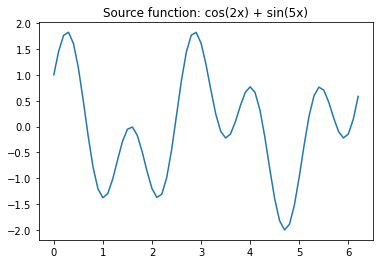

In [358]:
plt.figure(1)
plt.plot(x, y)
plt.title('Source function: cos(2x) + sin(5x)')

## Discrete Fourier transform

In [369]:
N = 32
x = [f(2 * np.pi * (i + 1) / N) for i in range(N)]
spectrum, iterations = dft(x)

Text(0.5, 1.0, 'Phase spectrum')

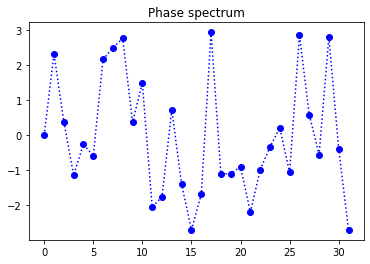

In [370]:
plt.figure(1)
plt.plot(np.arange(N), [cm.polar(x)[1] for x in spectrum], "b:o")
plt.title('Phase spectrum')

Text(0.5, 1.0, 'Amplitude spectrum')

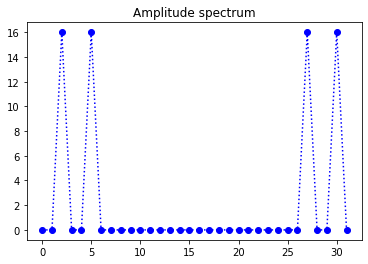

In [371]:
plt.figure(1)
plt.plot(np.arange(N), [cm.polar(x)[0] for x in spectrum], "b:o")
plt.title('Amplitude spectrum')

Text(0.5, 1.0, 'Inverse')

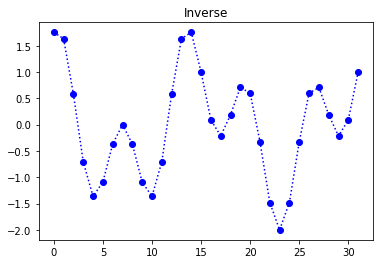

In [372]:
plt.figure(1)
plt.plot(np.arange(N), [x.real for x in idft(spectrum)], "b:o")
plt.title('Inverse')

## Fast Fourier transform

Text(0.5, 1.0, 'Phase spectrum')

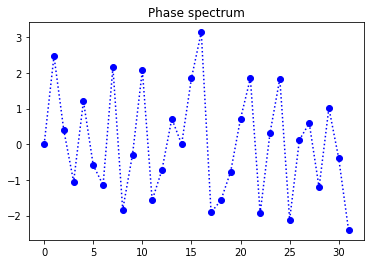

In [373]:
fft_spectrum, fft_iterations = fft(x)
plt.figure(1)
plt.plot(np.arange(N), [cm.polar(x)[1] for x in fft_spectrum], "b:o")
plt.title('Phase spectrum')

Text(0.5, 1.0, 'Amplitude spectrum')

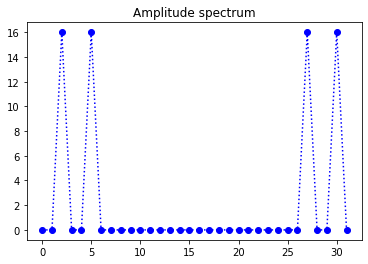

In [324]:
plt.figure(1)
plt.plot(np.arange(N), [cm.polar(x)[0] for x in fft_spectrum], "b:o")
plt.title('Amplitude spectrum')

Text(0.5, 1.0, 'Inverse')

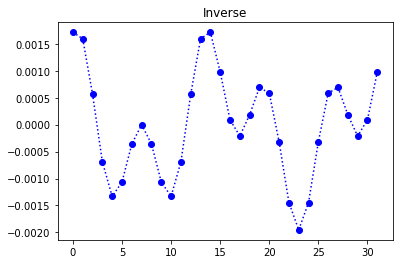

In [374]:
plt.figure(1)
plt.plot(np.arange(N), [x.real for x in ifft(spectrum)], "b:o")
plt.title('Inverse')

In [375]:
print(f"dft iters: {iterations}")
print(f"ifft iters: {fft_iterations}")

dft iters: 1024
ifft iters: 48
